!!! Код выполняет все те же пункты, что в PostgreSQL. Но теперь решение через Pandas !!!

Задачи работы:

1. Медианный чек, средняя прибыль на заказ. Круговая диаграмма распределения продаж по подкатегориям
2. Топ-5 самых продаваемых и прибыльных товаров. Bar plot топ-5 товаров по продажам
3. Корреляция между количеством товаров, стоимостью и прибылью.

Информация про конкретную страну в 2018 году: Германия

1. Продажи и прибыль по городам. Выявление наиболее и наименее прибыльных городов
2. Топ-3 самые прибыльные подкатегории. Топ-5 самых прибыльных городов для каждой такой подкатегории (по 5 городов для каждой подкатегории)
3. Самые популярные города по каждому виду доставки (по два города)
4. Самый прибыльный месяц. Самый прибыльный город этого месяца и самая прибыльная подкатегория этого города
5. В каком сегменте покупателей наиболее распространена доставка типа "Economy"
6. Какие категории товаров дают самых ценных потребителей? Какие группы клиентов приносят наибольшую прибыль? 
7. Выводы работы

Пояснения к таблице:

Order ID -> ID заказа

Order Date -> Дата заказа

Customer Name -> Имя клиента

City -> Город

Country -> Страна

State -> Штат

Region -> Регион

Segment -> Сегмент потребителей

Category -> Категория

Ship Mode -> Режим отправки заказа

Sub-Category -> Подкатегория

Product Name -> Название продукта

Quantity -> Количество проданного товара

Cost -> Затраты на производство Quantity-товаров

Profit -> Прибыль с продажи Quantity-товаров (Sales - Cost)

Sales -> Выручка с продажи Quantity-товаров (Profit + Cost)

In [3]:
import pandas as pd
shop = pd.read_csv(r"C:\Dima\Резюме-программы\Kaggle\Shop Direct Sale Data For Research.csv", index_col = 'Order ID', parse_dates = ['Order Date'])
shop.head()

,Order Date,Customer Name,City,Country,State,Region,Segment,Category,Ship Mode,Sub-Category,Product Name,Quantity,Cost,Profit,Sales
Order ID,,,,,,,,,,,,,,,
1,2017-01-01,Ruby Patel,Stockholm,Sweden,Stockholm,North,Home Office,Office Supplies,Economy Plus,Paper,"Enermax Note Cards, Premium",3,9,36,45
2,2017-01-03,Summer Hayward,Southport,United Kingdom,England,North,Consumer,Furniture,Economy,Bookcases,"Dania Corner Shelving, Traditional",7,255,599,854
3,2017-01-04,Devin Huddleston,Valence,France,Auvergne-Rhône-Alpes,Central,Consumer,Office Supplies,Economy,Art,"Binney & Smith Sketch Pad, Easy-Erase",3,48,92,140
4,2017-01-04,Mary Parker,Birmingham,United Kingdom,England,North,Corporate,Office Supplies,Economy,Art,"Boston Markers, Easy-Erase",2,9,18,27
5,2017-01-05,Daniel Burke,Echirolles,France,Auvergne-Rhône-Alpes,Central,Home Office,Office Supplies,Priority,Art,"Binney & Smith Pencil Sharpener, Water Color",3,40,50,90


1. Медианный чек, средняя прибыль на заказ. Круговая диаграмма распределения продаж по подкатегориям

In [5]:
# Медианный чек
shop['Sales'].median()

120.0

In [6]:
# средняя прибыль на заказ
round(shop['Profit'].mean(), 2)

152.36

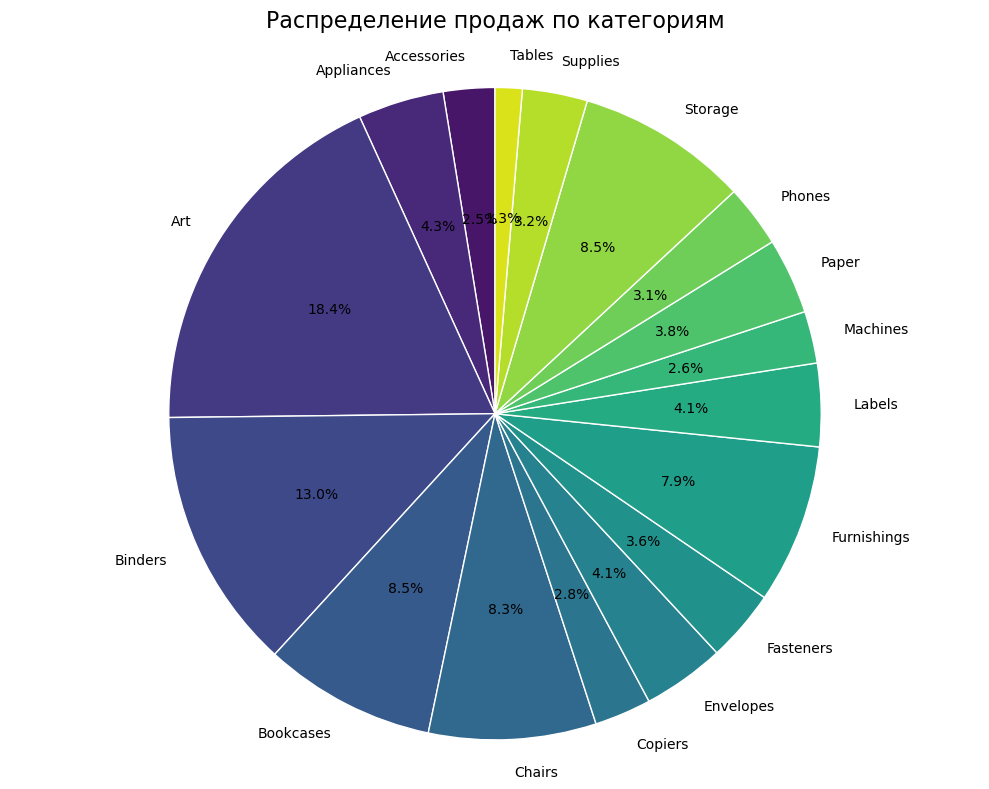

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

pie_data = shop[['Quantity', 'Sub-Category']].groupby('Sub-Category').sum().reset_index()
plt.figure(figsize=(10, 8))

plt.pie(
    pie_data['Quantity'],
    labels=pie_data['Sub-Category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(pie_data)),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title('Распределение продаж по категориям', fontsize=16, pad=20)

plt.axis('equal')

plt.tight_layout()
plt.show()

2. Топ-5 самых продаваемых и прибыльных товаров. Bar plot топ-5 товаров по продажам

In [9]:
# Топ-5 самых продаваемых
shop.groupby('Sub-Category')[['Quantity', 'Profit']].sum().sort_values('Quantity', ascending=False).head()

,Quantity,Profit
Sub-Category,,
Art,2834,41302
Binders,2007,19661
Bookcases,1313,132297
Storage,1313,45363
Chairs,1279,79924


In [10]:
# Топ-5 самых прибыльных
shop.groupby('Sub-Category')[['Quantity', 'Profit']].sum().sort_values('Profit', ascending=False).head()

,Quantity,Profit
Sub-Category,,
Bookcases,1313,132297
Chairs,1279,79924
Appliances,657,77656
Copiers,434,46238
Storage,1313,45363


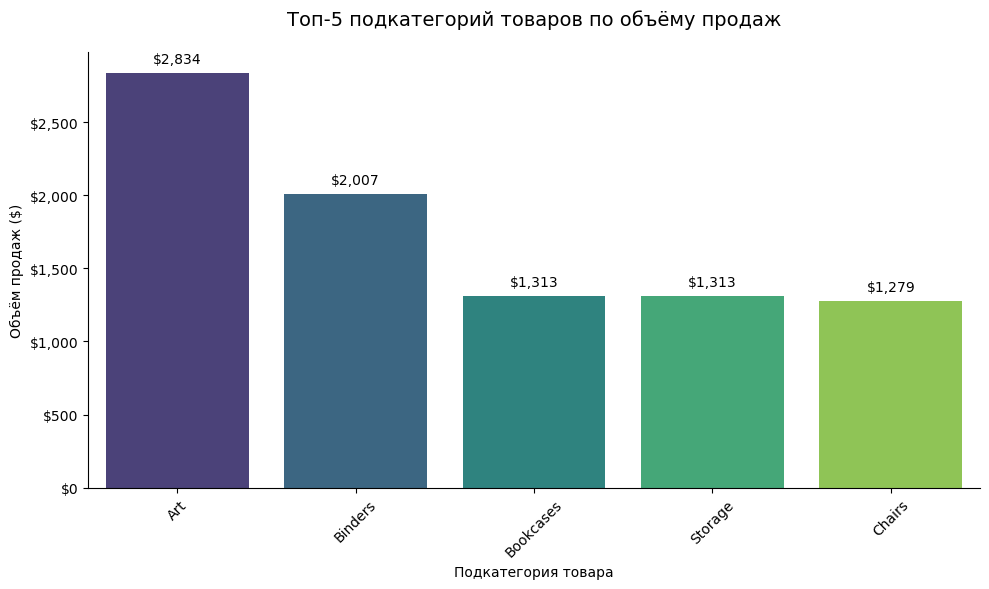

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

top_products = (shop.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head().reset_index())

plt.figure(figsize=(10, 6))

# Строим barplot
bar_plot = sns.barplot(
    data=top_products,
    x='Sub-Category',
    y='Quantity',
    palette='viridis',
    hue='Sub-Category',
    dodge=False,
    legend=False
)

for p in bar_plot.patches:
    bar_plot.annotate(
        f'${p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10
    )

plt.title('Топ-5 подкатегорий товаров по объёму продаж', fontsize=14, pad=20)
plt.xlabel('Подкатегория товара')
plt.ylabel('Объём продаж ($)')
plt.xticks(rotation=45)
sns.despine()

plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.tight_layout()
plt.show()

3. Корреляция между количеством проданных товаров, себестоимостью и прибылью.

Вывод по корреляциям:

Общая стоимость и себестоимость: 0.85. Это означает, что с ростом выручки обычно увеличиваются и затраты. Чем больше продаёшь, тем больше тратишь на производство товаров.

Общая стоимость и прибыль: 0.82. Чем выше выручка, тем выше прибыль.

Себестоимость и прибыль: 0.38. Это говорит о том, что рост затрат не всегда ведёт к пропорциональному росту прибыли.

Возможные причины: 
1) Непостоянная наценка (например, в некоторых случаях высокая себестоимость съедает прибыль).

2) Разные категории товаров по маржинальности

In [14]:
shop[['Sales', 'Cost', 'Profit']].corr()

,Sales,Cost,Profit
Sales,1.000000,0.845776,0.816786
Cost,0.845776,1.000000,0.382999
Profit,0.816786,0.382999,1.000000


Информация про конкретную страну в 2018 году: Германия

1. Продажи и прибыль по городам. Выявление наиболее и наименее прибыльных городов

In [17]:
trade = shop[(shop['Country'] == "Germany") & (shop['Order Date'].dt.year == 2018)]
# Самые прибыльные
trade.groupby('City')[['Quantity','Profit']].sum().sort_values('Profit', ascending = False).head()

,Quantity,Profit
City,,
Berlin,93,5651
Hamburg,29,2663
Nuremberg,6,2433
Munich,45,1818
Bochum,19,1732


In [18]:
# Менее прибыльные
trade.groupby('City')[['Quantity','Profit']].sum().sort_values('Profit').head()

,Quantity,Profit
City,,
Dresden,2,1
Hildesheim,3,2
Augsburg,3,4
Remscheid,5,5
Ennigerloh,2,8


2. Топ-3 самые прибыльные подкатегории. Топ-5 самых прибыльных городов для каждой такой подкатегории (по 5 городов для каждой подкатегории)

In [20]:
top_sub_category = shop[(shop['Country'] == "Germany") & (shop['Order Date'].dt.year == 2018)][['Sub-Category', 'Profit']]
top_sub_category = top_sub_category.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head(3)
top_sub_category

,Sub-Category,Profit
4,Bookcases,7077
5,Chairs,5740
13,Phones,4104


In [62]:
top_city = top_sub_category.merge(shop, on = 'Sub-Category', how = 'inner').sort_values('Profit_x', ascending=False)
top_city = top_city[(top_city['Country'] == "Germany") & (top_city['Order Date'].dt.year == 2018)]

grouped = top_city.groupby(['Sub-Category', 'City']).agg({'Profit_y': 'sum'}).reset_index()
sorted_groups = grouped.sort_values(['Sub-Category', 'Profit_y'], ascending=[True, False])
top_5_cities = sorted_groups.groupby('Sub-Category').head()
top_5_cities.set_index('Sub-Category')

,City,Profit_y
Sub-Category,,
Bookcases,Hamburg,2213
Bookcases,Bochum,1546
Bookcases,Dortmund,665
Bookcases,Dorsten,628
Bookcases,Munich,596
Chairs,Berlin,1850
Chairs,Emden,922
Chairs,Oberhausen,669
Chairs,Erfurt,414


3. Самые популярные города по каждому виду доставки (по два города)

In [23]:
germany = shop[(shop['Country'] == "Germany") & (shop['Order Date'].dt.year == 2018)]
top_city = germany.value_counts(['Ship Mode', 'City']).groupby(level=0).head(2).reset_index()
top_city.sort_values('Ship Mode') # Сколько раз встречался тот или иной город

,Ship Mode,City,count
0,Economy,Berlin,15
1,Economy,Munich,9
2,Economy Plus,Berlin,6
4,Economy Plus,Jena,2
5,Immediate,Dormagen,1
6,Immediate,Bochum,1
3,Priority,Munich,3
7,Priority,Weimar,1


4. Самый прибыльный месяц. Самый прибыльный город этого месяца и самая прибыльная подкатегория этого города

In [25]:
germany = shop[(shop['Country'] == "Germany") & (shop['Order Date'].dt.year == 2018)].copy()
germany['Order Date'] = germany['Order Date'].dt.month
top_month = germany.groupby('Order Date')['Profit'].sum().sort_values(ascending=False).head(1).reset_index() # 8 месяц = Август
top_month # Самый прибыльный месяц

,Order Date,Profit
0,8,7303


In [26]:
germany = shop[(shop['Country'] == "Germany") & (shop['Order Date'].dt.year == 2018)].copy()
germany['Order Date'] = germany['Order Date'].dt.month

top_months = top_month.merge(germany, on = 'Order Date', how = 'inner')
top_city = top_months.groupby('City')['Profit_y'].sum().sort_values(ascending=False).head(1).reset_index()
top_city # Самый прибыльный город этого месяца

,City,Profit_y
0,Nuremberg,2406


In [27]:
germany = shop[(shop['Country'] == "Germany") & (shop['Order Date'].dt.year == 2018)].copy()
germany['Order Date'] = germany['Order Date'].dt.month

top_cities = top_city.merge(germany, on = 'City', how = 'inner')
top_cities.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(1).reset_index() # Самая прибыльная подкатегория этого города

,Sub-Category,Profit
0,Tables,2406


5. В каком сегменте покупателей наиболее распространена доставка типа "Economy"

In [29]:
germany = shop[(shop['Country'] == "Germany") & (shop['Order Date'].dt.year == 2018) & (shop['Ship Mode'] == 'Economy')]
germany.groupby('Ship Mode')['Segment'].value_counts().head(1).reset_index()

,Ship Mode,Segment,count
0,Economy,Consumer,74


6. Какие категории товаров дают самых ценных потребителей? Какие группы клиентов приносят наибольшую прибыль?

In [31]:
# Какие категории товаров дают самых ценных потребителей
germany = shop[(shop['Country'] == "Germany") & (shop['Order Date'].dt.year == 2018)].copy()
germany.groupby('Category')['Profit'].sum().reset_index()

,Category,Profit
0,Furniture,16840
1,Office Supplies,7315
2,Technology,7830


In [32]:
# Какие группы клиентов приносят наибольшую прибыль
top_segment = germany.groupby('Segment')['Profit'].sum().reset_index()
top_segment

,Segment,Profit
0,Consumer,20505
1,Corporate,7230
2,Home Office,4250


In [33]:
# Сколько процентов от всех потребителей составляют частные потребилтели - самая прибыльная группа
top_consumer =  germany['Segment'].value_counts().reset_index()
top_count = top_consumer['count'].sum()
round((top_consumer.loc[0, 'count'] / top_count) * 100, 2)

56.04

In [34]:
# Сколько процентов от всех прибыли составляет прибыль от частных потребителей
top_value = germany['Profit'].sum()
round((top_segment.loc[0, 'Profit'] / top_value) * 100, 2)

64.11

7. Выводы работы (то же самое, что и в файле с PostgreSQL)

1. Самыми прибыльными городами Германии в 2018 году являются Берлин, Гамбург, Нюрнберг, Мюнхен. Это связано с большими размерами городов и их населением, вследствие чего количество заказов и выручка там находятся на высоких позициях. Так что результаты вполне ожидаемы.

    Что же касается наименее прибыльных городов, то худшее положение у Дрездена. Хоть город является большим по площади и населению, количество заказов и прибыль крайне малы. Для выявления причины такого маленького спроса на товары можно изучить, на что ориентирован город в большей степени (некоторые города могут быть заточены на какую-то конкретную функцию: город для предпринимателей, IT-специалистов, торговый город и прочее. Гамбург, например, является важным торговым портовым городом Германии). Возможно, товары, которые мы продаём, просто не востребованы в Дрездене.
    !!!Хотя, скорее всего, в нашем случае это мало вероятно, так как наши товары влючают в себя телефоны, стулья, столы и прочие вещи, которыми пользуются все и везде!!!

   Если же наши товары нужны в этом городе, то нужно провести маркетинговую кампанию в городе и изучить конкурентов (цены, маркетинг, качество)
   
2. Самыми популярными товарами являются телефоны, книжные полки и стулья. А в топе городов по продажам этих товаров чаще всего встречается Берлин и Мюнхен - два крупных города, один из которых является столицей. Так что и эти результаты вполне ожидаемы.

4. Самым прибыльным месяцем является Август, самый прибыльный город в Августе - Нюрнберг с прибылью 2406. Самый продаваемый товар Нюрнберга в Августе - столы с прибылью от продаж 2406, что означает следующее: столы были единственным товаром, который продавался нашей компанией в Нюрнберге в 2018 году в Августе

5. Доставка типа "Economy" наиболее распространена среди частных потребителей. Скорее всего, это связано с тем, что физические лица не хотят доплачивать деньги за более быструю доставку в отличие от офисов.

6. Частные потребители (физические лица) оказались самой прибыльной категорией потребителей. А самой прибыльной группой товаров оказалась мебель. Логично предположить, что эти две группы дополняют друг друга (простым людям в большинстве случаев нужна мебель, а не офисные принадлежности)

    Кроме того, было выявлено, что 56% всех потребителей составляют физические лица, на которых приходится 64% всей прибыли